In [2]:
import numpy as np
import pylab as pl
from ipywidgets import interact, interactive, fixed,widgets
from IPython.display import display

(429, 600)


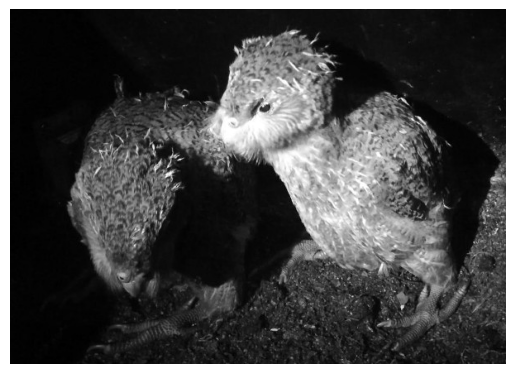

In [8]:
# Choose an image and plot it
im = pl.imread('cute.jpg')
print(np.shape(im))
fig=pl.imshow(im,cmap='gray')
pl.axis('off');

In [7]:
# We need to compute the SVD. Numpy will do it for us, and give back the three matrices.
# The size of the matrices is based on the size of the shape. 
# Note that the eigenvalue matrix (s) is diagonal, so only the elements down the diagonal are given, hence it is 1D.
u,s,vT = np.linalg.svd(im,full_matrices=False)
print(np.shape(u),np.shape(s),np.shape(vT))

(429, 429) (429,) (429, 600)


Text(0.5, 0, 'k')

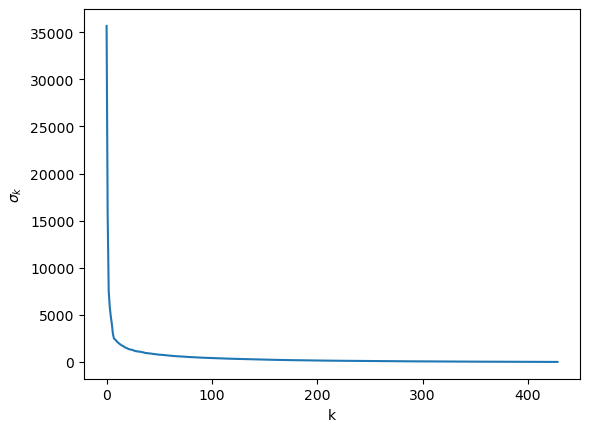

In [5]:
# The eigenvalues (in s) are in decreasing size order, as we can see if we plot them:
pl.plot(s)
pl.ylabel(r'$\sigma_k$')
pl.xlabel('k');

In [10]:
# To invert the SVD, we just choose how many components we want to keep (k) and then 
# use that many eigenvalues in the matrix multiplication (which is @) 
def invert_svd(k):
    t = np.zeros(np.shape(s))
    t[:k]=s[:k]
    im1= u@np.diag(t)@vT
    fig=pl.figure(figsize=(20,12))
    fig.add_subplot(131)
    pl.imshow(im,cmap='gray')
    pl.axis('off')
    pl.subplot(1,3,2)
    pl.imshow(im1,cmap='gray')
    pl.axis('off')
    pl.subplot(1,3,3)
    pl.imshow(((im-im1)+1)/2,cmap='gray')
    pl.axis('off')

In [11]:
# We plot the original image, the reconstructed image, and the difference between them.
# Use the slider to choose how many eigenvalues to use
interact(invert_svd,k=widgets.IntSlider(min=1, max=len(s), step=1, value=50));

interactive(children=(IntSlider(value=50, description='k', max=429, min=1), Output()), _dom_classes=('widget-i…

In [12]:
interact(invert_svd,k=widgets.IntSlider(min=1, max=30, step=1, value=10));

interactive(children=(IntSlider(value=10, description='k', max=30, min=1), Output()), _dom_classes=('widget-in…